# Importing Dataset and Initial analysis

In [12]:
import numpy as np
import pandas as pd

In [13]:
iris = pd.read_csv("iris.csv")
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
iris.rename(columns = {'sepal_length':'Sepal Length','sepal_width':'Sepal Width','petal_length':'Petal Length','petal_width':'Petal Width','species':'Species'},inplace = True)


In [15]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris['Species'].nunique()

3

In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
iris.shape

(150, 5)

In [19]:
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

# Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

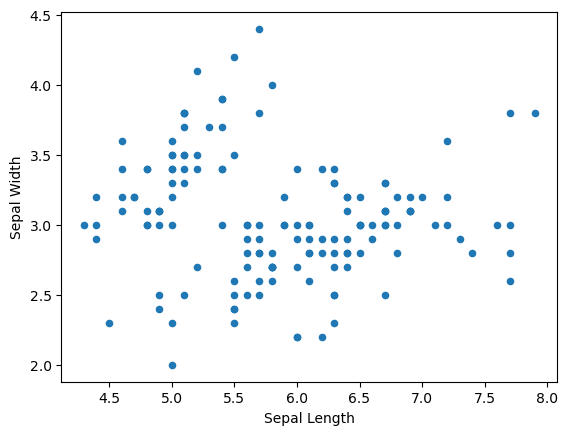

In [21]:
iris.plot(kind='scatter',x='Sepal Length',y='Sepal Width')
plt.show()

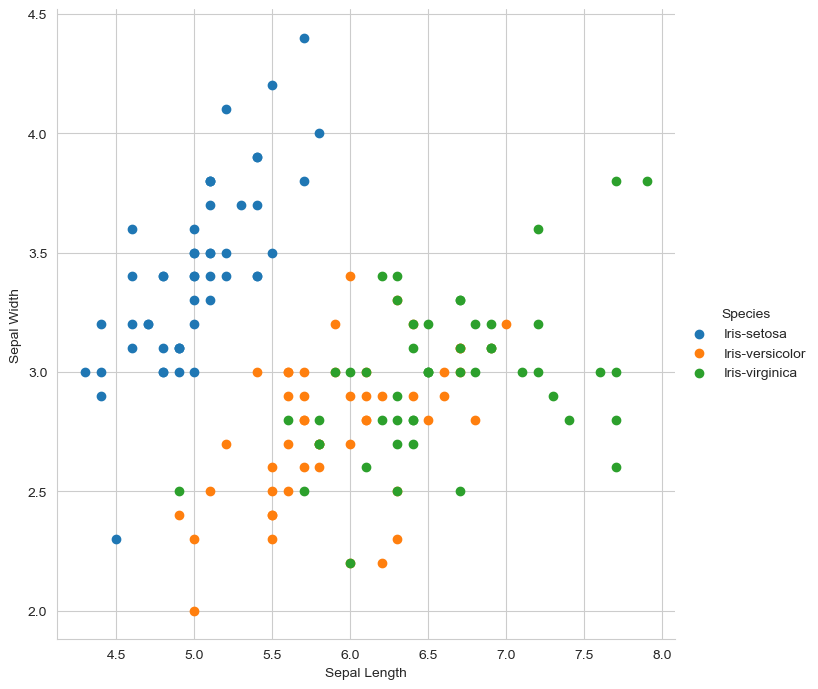

In [24]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species",height=7) \
   .map(plt.scatter, "Sepal Length","Sepal Width") \
   .add_legend();
plt.show()

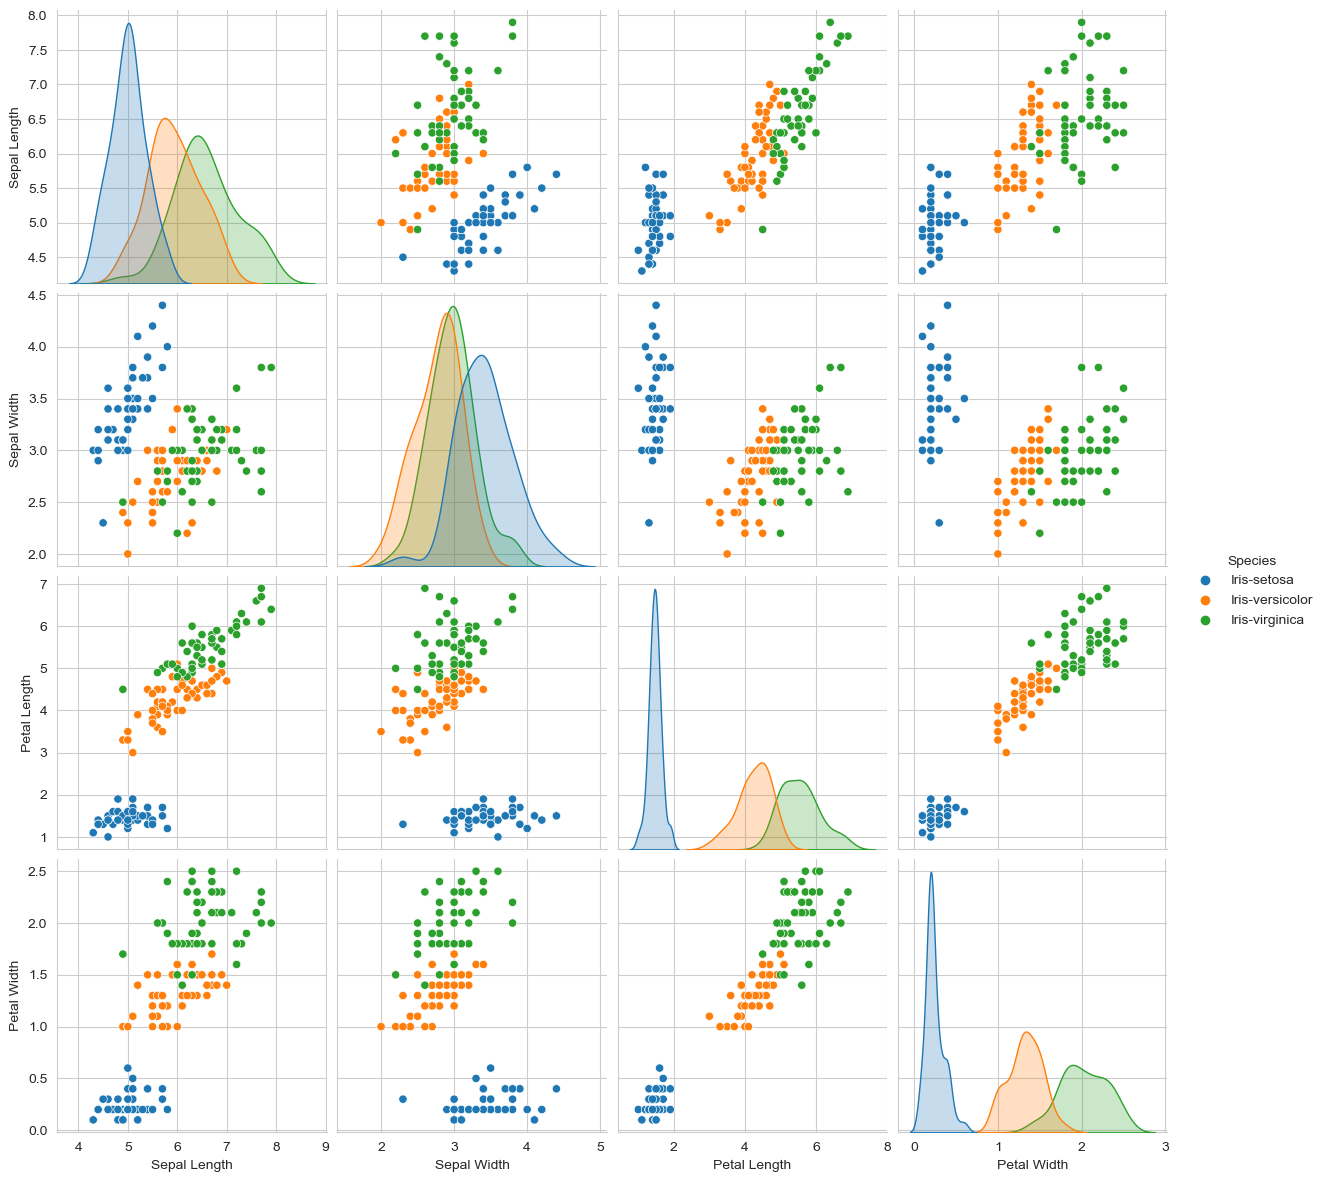

In [25]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="Species",height=3);
plt.show()

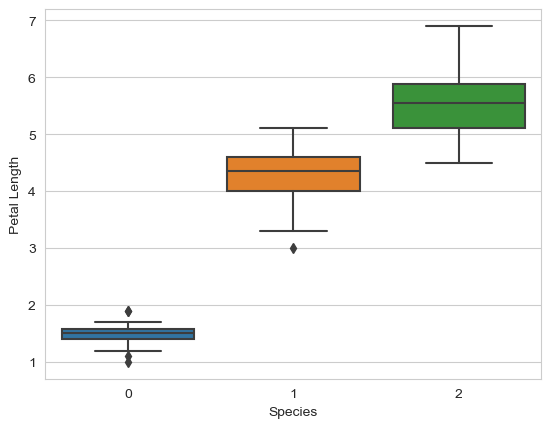

In [32]:
sns.boxplot(x='Species',y='Petal Length', data=iris)
plt.show()

# Preprocessing

In [26]:
# Define the mapping of categorical values to numerical values
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [27]:
# Replace the categorical values with numerical values
iris['Species'] = iris['Species'].replace(species_mapping)

In [28]:
iris.head(20)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [31]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Building Model

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create an SVM classifier
classifier = svm.SVC()

In [38]:
# Train the classifier on the training data
classifier.fit(X_train, y_train)

SVC()

In [39]:
# Predict the species for the test data
y_pred = classifier.predict(X_test)

In [40]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Evaluating Performance

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

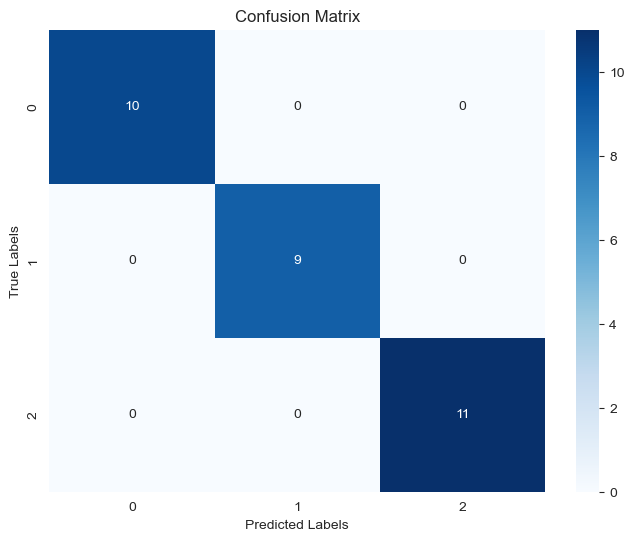

In [44]:
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.metrics import  precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
